# Quiz 1

LIS MASc  
Engaging Complexity

Access this notebook on GitHub TODO  
PDF generated using [nbconvert](https://nbconvert.readthedocs.io/en/latest/index.html)


In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
plt.rcParams["figure.dpi"] = 300

## 1. Laminar flow


In [279]:
def laminar_flow(radius):
    return 18500 * (0.25 - radius**2) 

### (a)


In [280]:
a1 = 0.1
a2 = 0.4

print(f"v({a1}) =", laminar_flow(a1))
print(f"v({a2}) =", laminar_flow(a2))

v(0.1) = 4440.0
v(0.4) = 1664.9999999999993


### (b)


The blood flows faster near the center of the artery and decreases with distance in a nonlinear way.


### (c)


In [281]:
values = np.linspace(0, 0.5, 6)
data = {'r': values, 'v(r)': laminar_flow(values)}
pd.DataFrame(data)

,r,v(r)
0,0.0,4625.0
1,0.1,4440.0
2,0.2,3885.0
3,0.3,2960.0
4,0.4,1665.0
5,0.5,0.0


### (d)

<img src="static/laminar_hand.jpeg" alt="laminar flow graph made by hand" width="400" height="400">


## 2


### (a)


In [282]:
def baloon_thickness_cm(radius_cm):
    return 0.5 / (radius_cm * radius_cm)

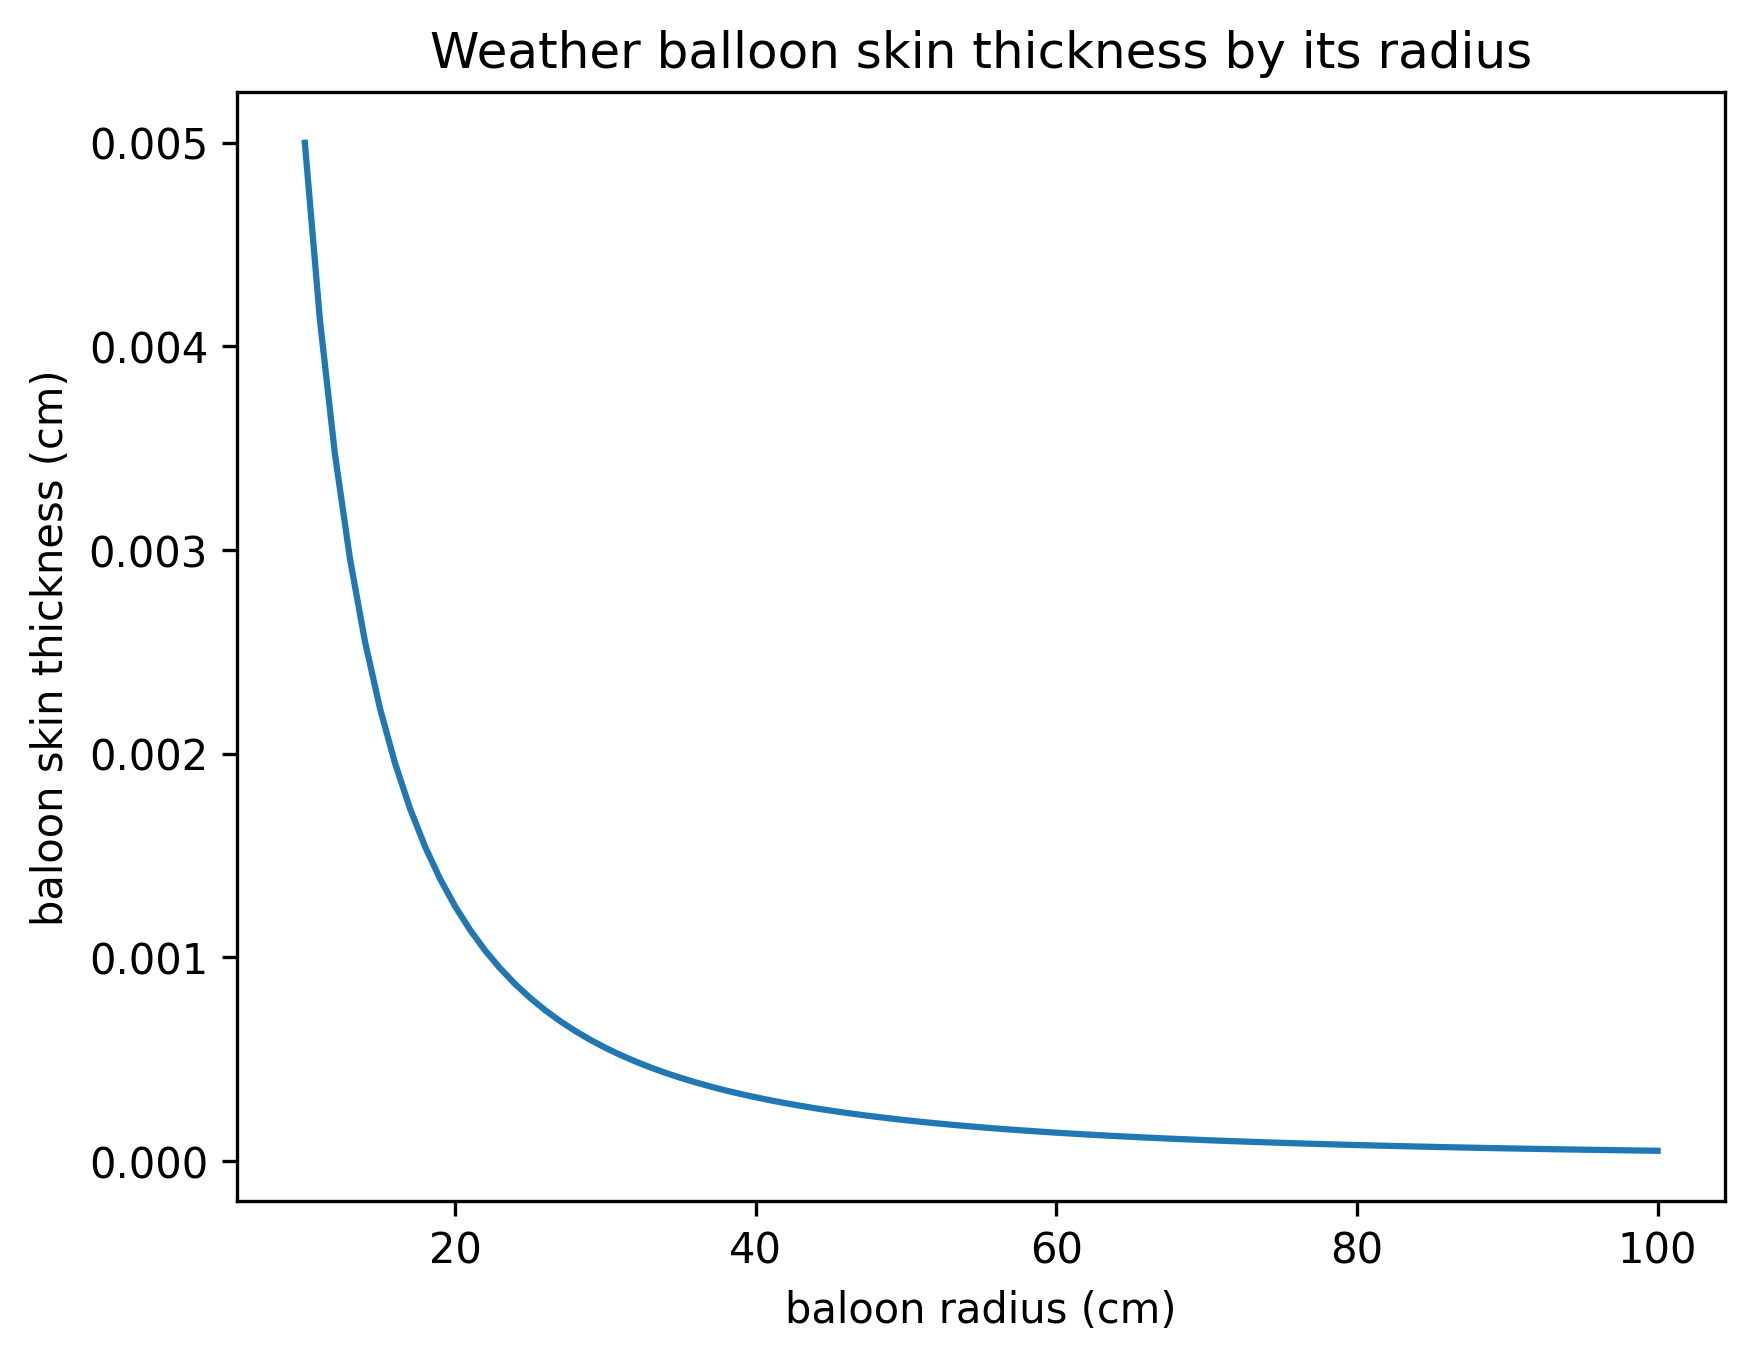

In [283]:
values = np.arange(10, 101)

plt.plot(values, baloon_thickness_cm(values))
plt.xlabel("baloon radius (cm)")
plt.ylabel("baloon skin thickness (cm)")
plt.title("Weather balloon skin thickness by its radius");

### (b)


In [284]:
def wind_power_w(speed_mps):
    return 14.1 * speed_mps * speed_mps * speed_mps

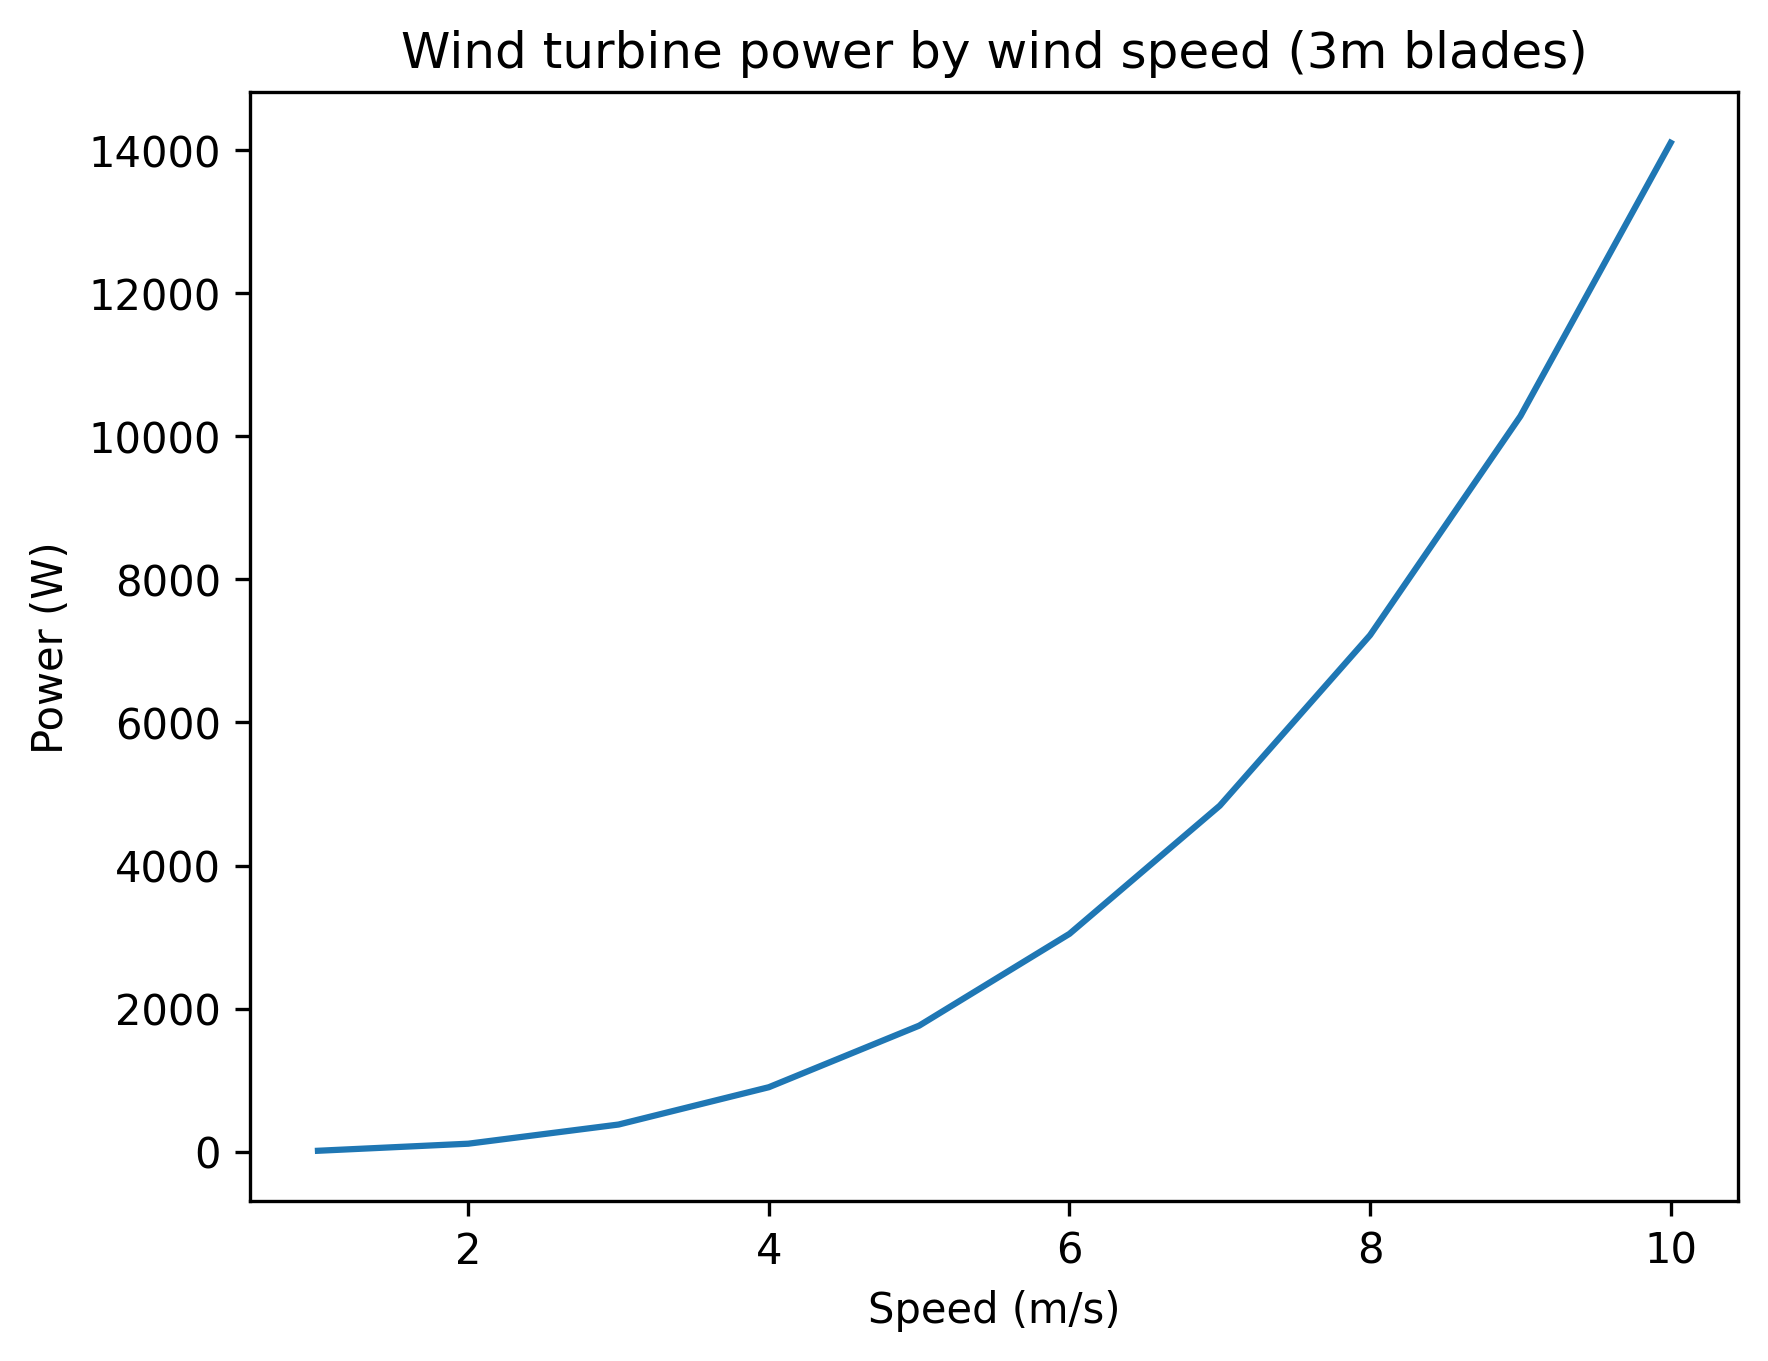

In [285]:
values = np.arange(1, 11)

plt.plot(values, wind_power_w(values))
plt.xlabel("Speed (m/s)")
plt.ylabel("Power (W)")
plt.title("Wind turbine power by wind speed (3m blades)");

## 3


### (a)

In [286]:
def a(prev):
    return 2 * (prev + 3)

print(a(4))
print(a(a(4)))
print(a(a(a(4))))
print(a(a(a(a(4)))))
print(a(a(a(a(a(4))))))

14
34
74
154
314


### (b)


In [287]:
def b(prev):
    return 1 / ( 1 + prev)

print(b(1))
print(b(b(1)))
print(b(b(b(1))))
print(b(b(b(b(1)))))
print(b(b(b(b(b(1))))))

0.5
0.6666666666666666
0.6000000000000001
0.625
0.6153846153846154


### (c)


In [288]:
def c(prev: int, pprev: int, iteration=0, max=5) -> int:
    if iteration > max:
        return prev
    
    value = prev - pprev
    iteration += 1
    print(value)    
    return c(value, prev, iteration, max=max)
    
c(3, 1, max=5)

2
-1
-3
-2
1
3


3

## 4


### (a)


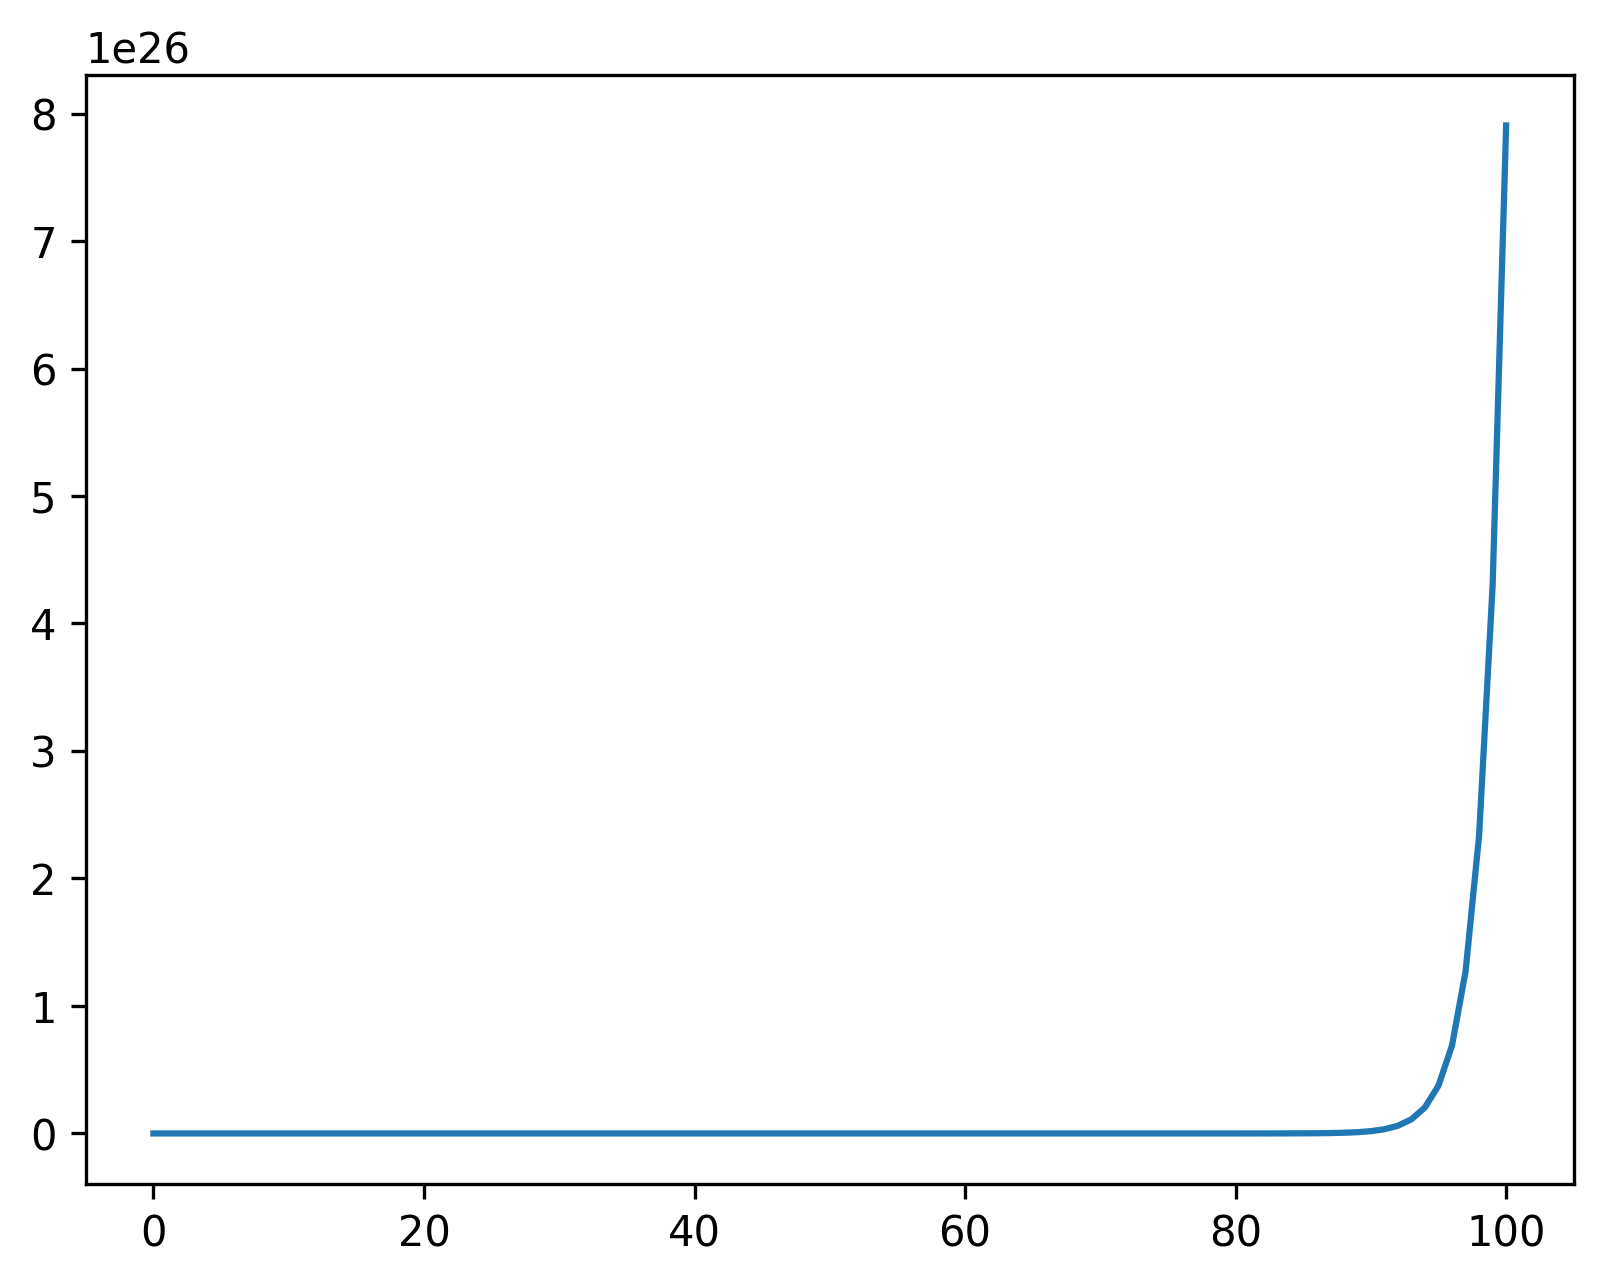

In [307]:
def a4(n_minus_one, n_minus_two, n_minus_three, iteration=0, max=100, result=[]):
    if iteration > max:
        return result
    
    n = n_minus_one + n_minus_two + n_minus_three
    result.append(n)
    iteration += 1
    
    return a4(n, n_minus_one, n_minus_two, iteration, max=max, result=result)
    
result = a4(1, 1, 1, max=100)
plt.plot(range(len(result)), result);

### (b)


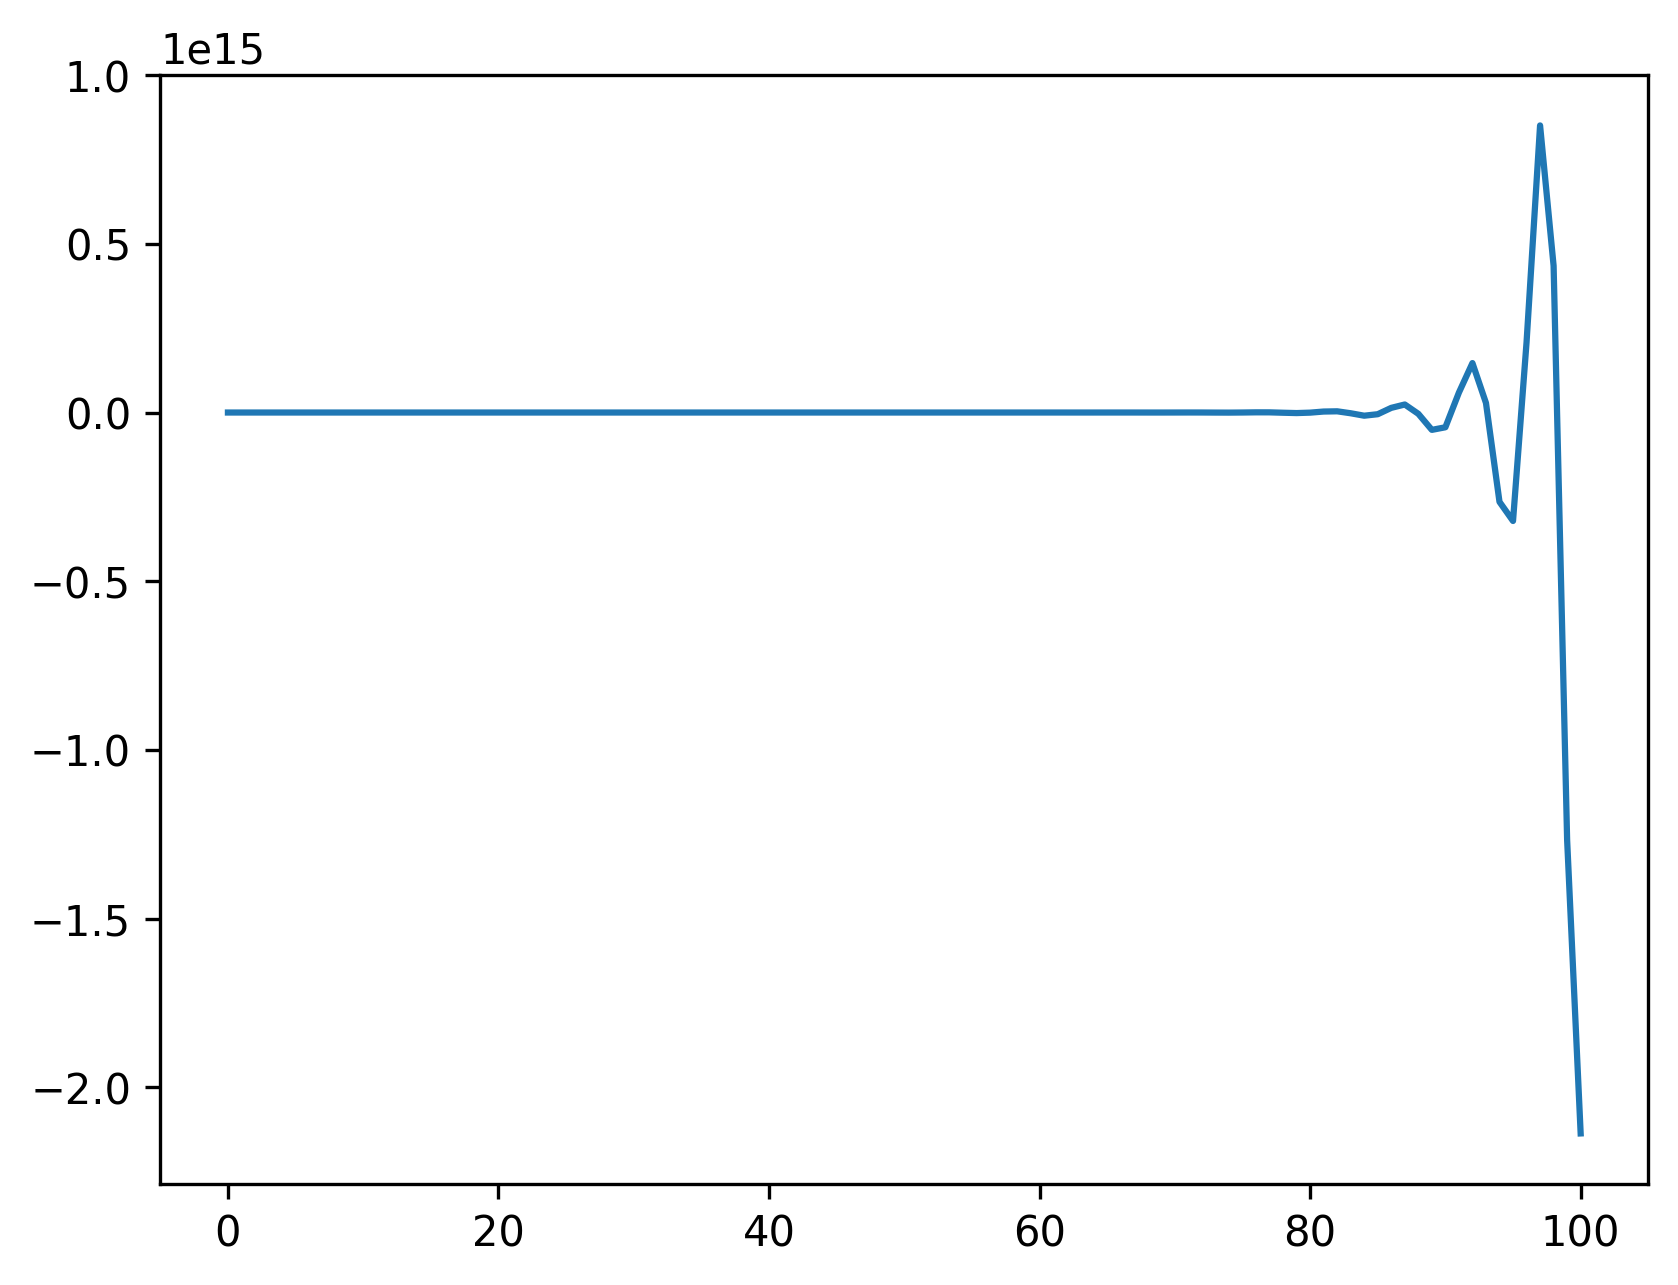

In [309]:
def b4(n_minus_one, n_minus_two, iteration=0, max=100, result=[]):
    if iteration > max:
        return result
    
    n = n_minus_one - (2 * n_minus_two)
    result.append(n)
    iteration += 1
    
    return b4(n, n_minus_one, iteration, max=max, result=result)
    
result = b4(1, 1)
plt.plot(range(len(result)), result);

### (c)


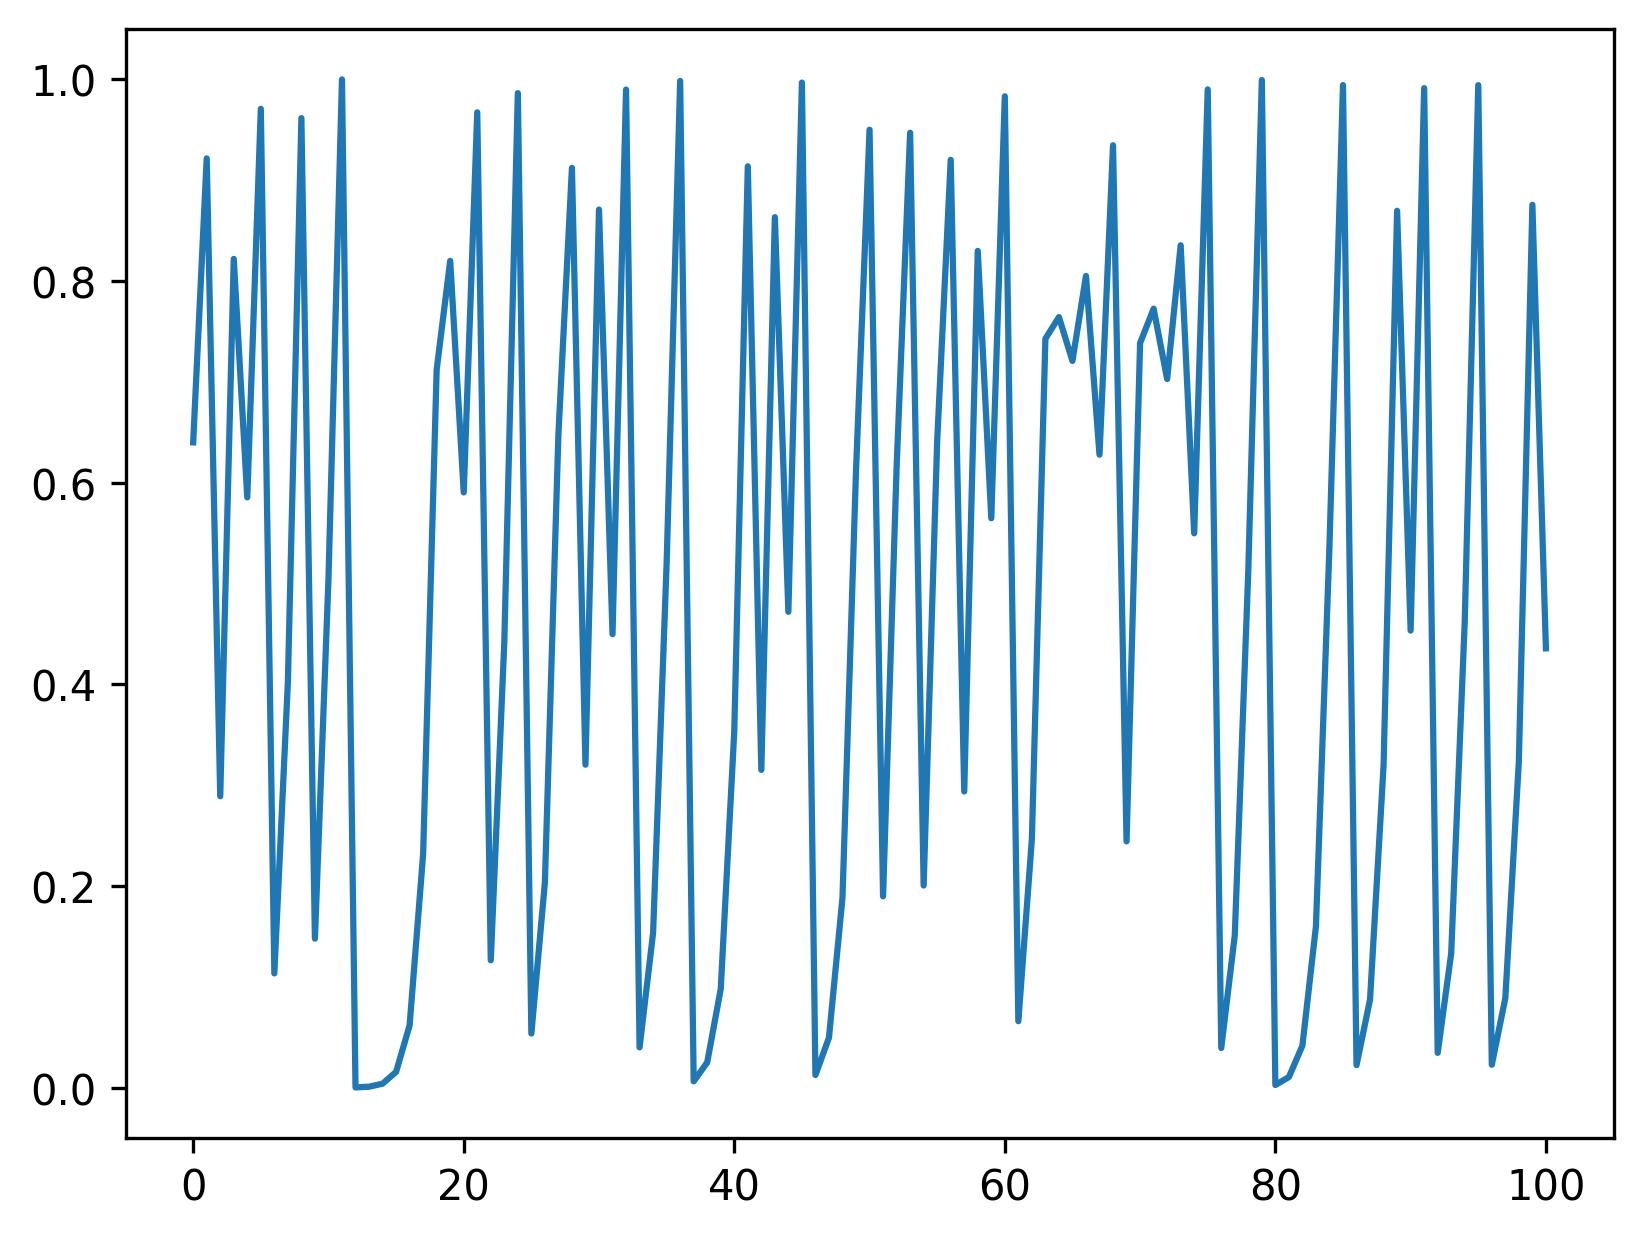

In [306]:
def c4(n_minus_one, iteration=0, max=100, result=[]):
    if iteration > max:
        return result
    
    n = (4 * n_minus_one) * (1 - n_minus_one)
    result.append(n)
    iteration += 1
    
    return c4(n, iteration, max=max, result=result)
    
result = c4(0.2)
plt.plot(range(len(result)), result); # no way!!!!!

## 5


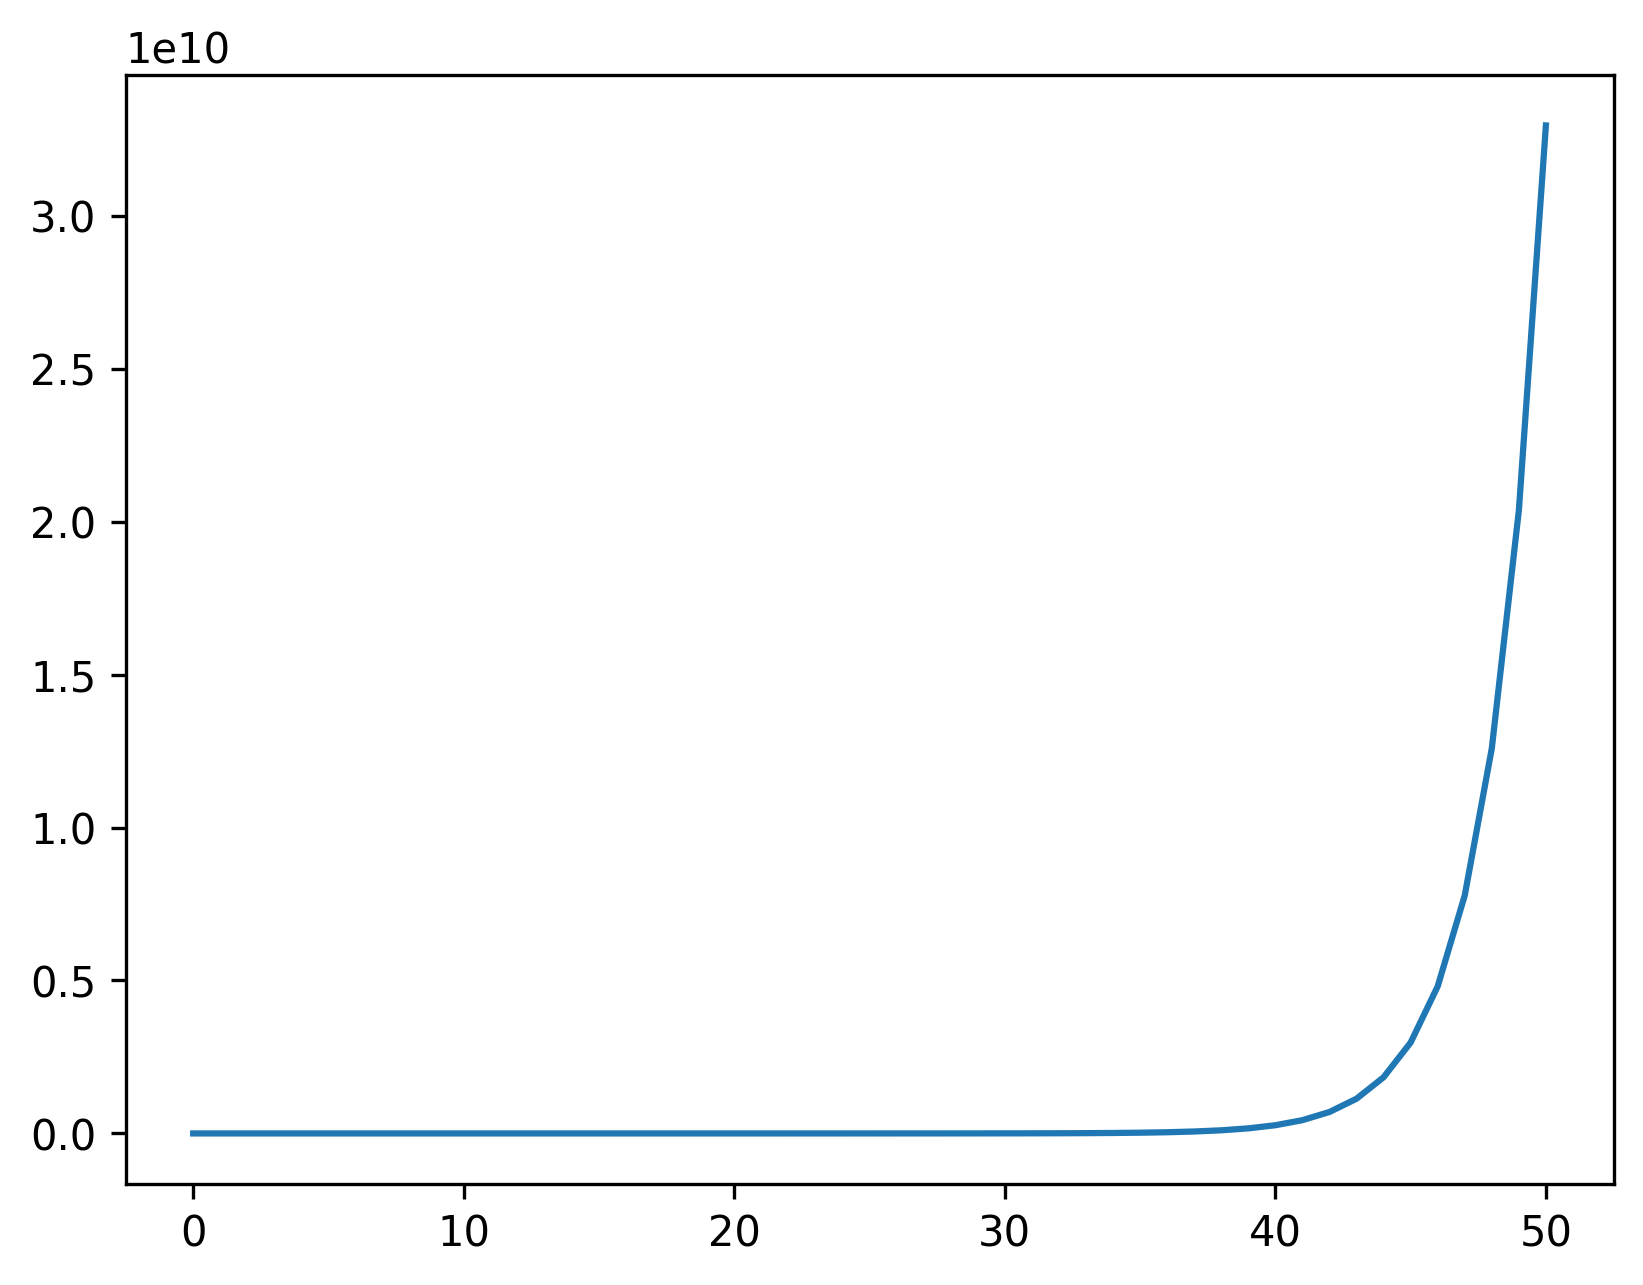

In [312]:
def five(n_minus_one, n_minus_two, iteration=0, max=50, result=[]):
    if iteration > max:
        return result
    
    n = n_minus_one + n_minus_two
    result.append(n)
    iteration += 1
    
    return five(n, n_minus_one, iteration, max=max, result=result)
    
result = five(1, 0, max=50)
plt.plot(range(len(result)), result);

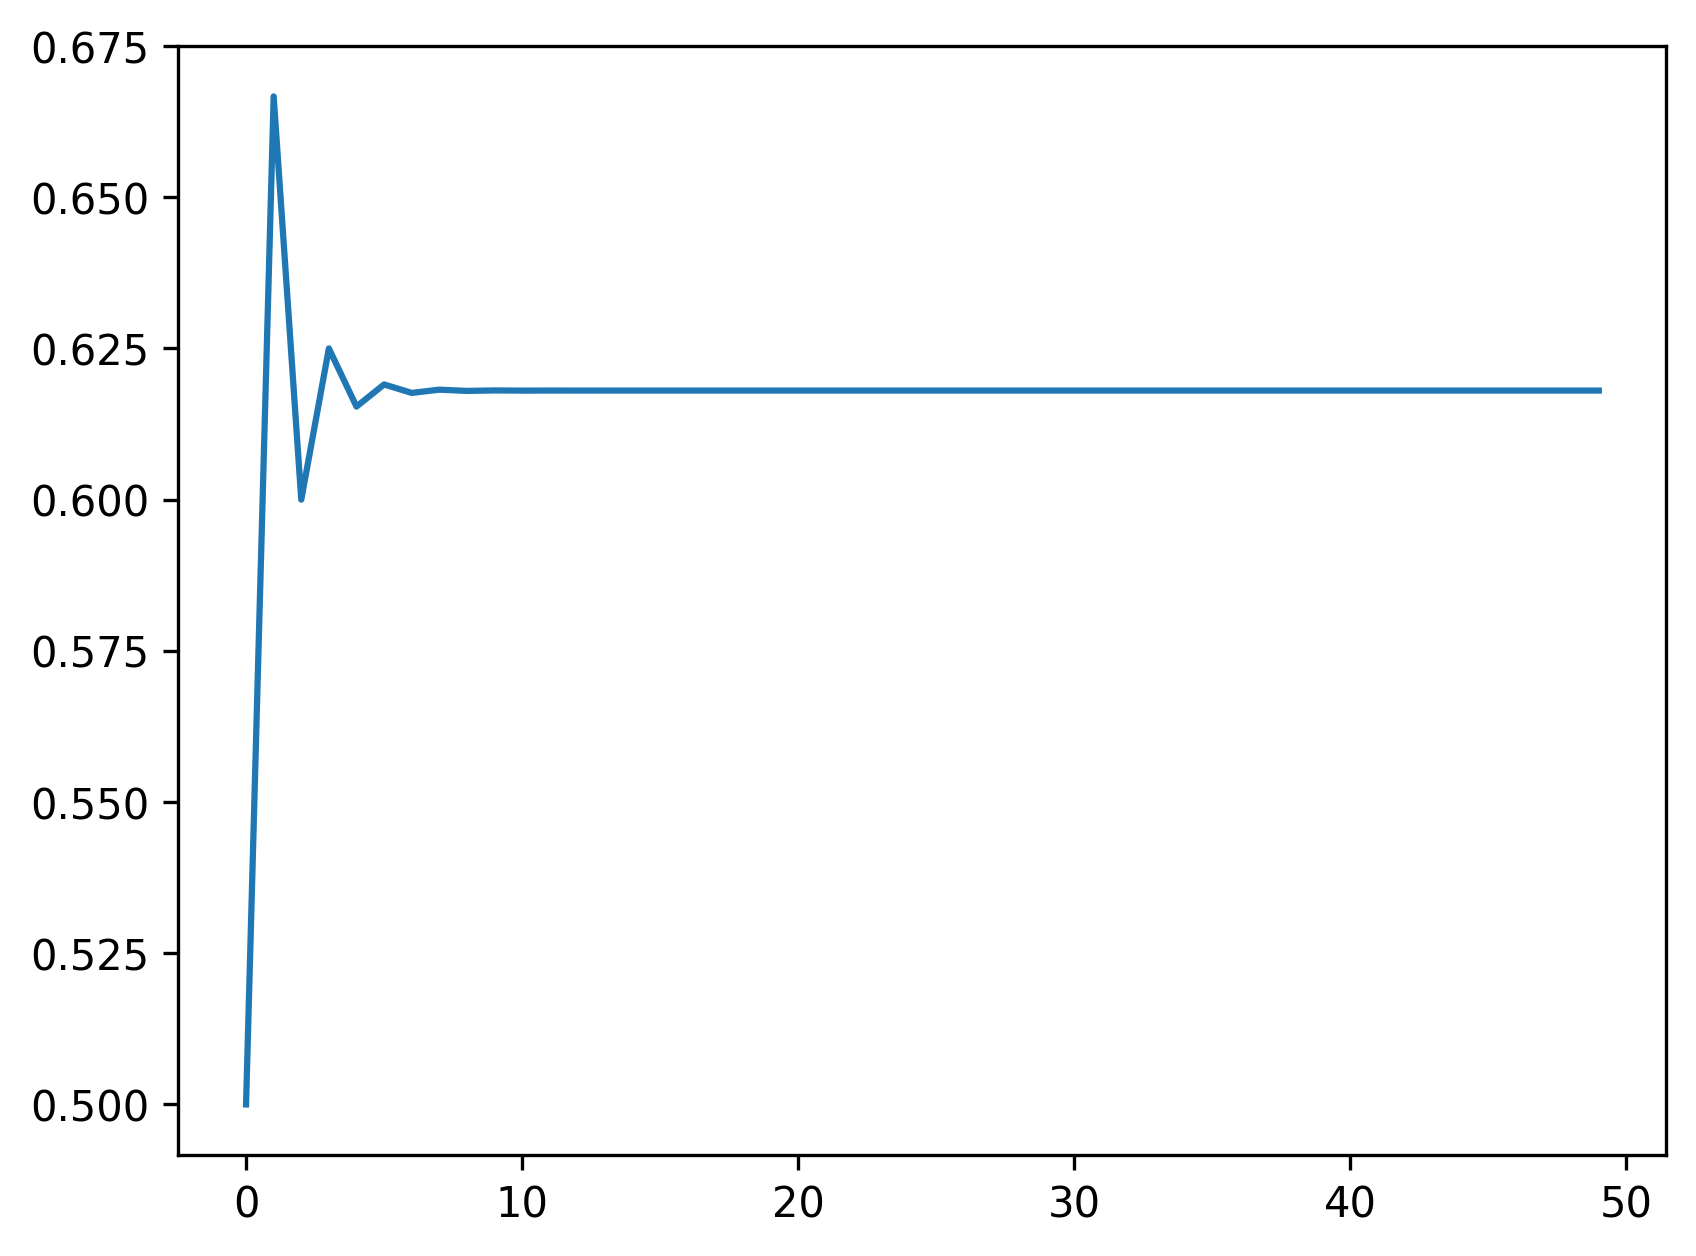

In [ ]:
result_copy = result.copy() # duplicate array
result.pop(0) # shift items back one index
result_copy.pop() # remove last item so arrays have same length
ratios = np.array(result_copy) / np.array(result) # calculate ratios

plt.plot(range(len(ratios)), ratios);

In [ ]:
ratios[25]

np.float64(0.6180339887543226)

The first plot shows a simple increasing function; the plot looks exponential even though the function itself is just a sum.

The second plot is very different. It oscillates in the beginning but converges around 0.618 - also known as the golden ratio.

While the long-time behaviour of the first function is to increase, the long-time behaviour of the second one is to stabilize.